# Inaugural project

# Question 1

In this project we aim to find the optimal labor supply and consumption.

The following utility function and budget constraint are given.

In the utility function we are using that $c^* = x$ in optimum, such that we can write the budget constraint instead of 'c'.

In [44]:
#Importing relevant packages
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import math

In [45]:
# Utility function
def u(l, w, m = 1, v = 10, eps = .3, t0 = .4, t1 = .1, k = .4):
    """
    The utility function: Utility increases monotonocally with larger consumption. 
    The utility decreases in labor, however the disutility of labor depends on the labor elasticity.
    Args: c: consumption, l: labor, eps: Frisch elasticity of labor supply, v: scales the disutility of labor.
    Returns: Float
    """
    return np.log(tr(w, l)) - v * (l ** (1 + 1/eps))/(1 + 1/eps)

# Constraint function
def tr(l, w, m = 1, v = 10, eps = .3, t0 = .4, t1 = .1, k = .4):
    """
    Constraint function: In maximum the consumer will use all ressources on consumption, therefore c = tr(w,l).
    Args: m: cash-on-hand, w: wage rate, t0: standard labor income tax, 
    t1: top bracket labor income tax, k: cut-off for the top labor income bracket.
    Returns: Float
    """
    return m + w * l - (t0 * w*l + t1 * max([w * l - k, 0]))

To calculate the optimal labor supply we use the optimize.minimze function from the scipy package.

In [46]:
# Bounds for the variable l
bounds = [(0, 1)]

# Call optimizer
initial_guess = 1  # some guess, should be feasible
res = optimize.minimize(lambda l: -u(l, w=1), initial_guess,method='SLSQP', bounds=bounds)

The solution yields the following labor supply, consumption and utility.

In [55]:
# Print results
print('In optimum we have the following:')
print('Labour is ' + f'{float(res.x):.2f}')
print("Consumption is " + f'{float(tr(l=res.x, w=1)):.2f}')
print("Utility is " + f'{-1*res.fun:.2f}')

In optimum we have the following:
Labour is 0.41
Consumption is 1.25
Utility is 0.23


# Question 2

Plotting labor and consumption as function of wages in range .5 to 1.5

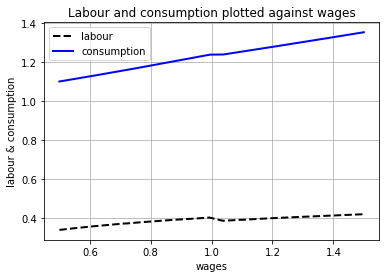

In [48]:
#plot of l(w) and c(w)

#Initiating figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Define variables for wage (0.5, 1.5)
w_vec = np.linspace(0.5,1.5,1000)
lab = np.empty(1000)
con = np.empty(1000)

def tr(l, w, m = 1, v = 10, eps = .3, t0 = .4, t1 = .1, k = .4):
    x = m + w * l - (t0 * w*l + t1 * max([w * l - k, 0]))
    return x
    
for i,w in enumerate(w_vec):
    res = optimize.minimize(lambda l: -u(l, w), initial_guess,method='SLSQP', bounds=bounds)
    lab[i] = res.x
    con[i] = tr(lab[i], w)
    
#Plotting consumptio and labor against wages
ax.plot(w_vec, lab, ls = '--', lw = 2, color = 'black', label = 'labour')
ax.plot(w_vec, con, ls = '-', lw = 2, color = 'blue', label = 'consumption')

#Formatting the visual presentation
ax.set_xlabel('wages')
ax.set_ylabel('labour & consumption')
ax.set_title('Labour and consumption plotted against wages')
ax.grid(True)
ax.legend(loc = 'upper left')

# Question 3

To calculate the total tax revenue, we are looping the values of $\omega_i$ pulled from a random uniform distribution $N = 10.000$ times.

In the for-loop we are optimizing $l_i^*$ and appending the tax revenue for 'i' to the total tax revenue.

In [49]:
# Set sample size
N = 10000

# Initial value of T
T = 0

# Appending T from each tax payer to the total, using a for loop
for w in range(N):
    w = np.random.uniform(.5, 1.5) # Random nr. from uniform dist.
    res = optimize.minimize(lambda l: -u(l,w), initial_guess,
    method='SLSQP', bounds=bounds) # Optimization for 'i'
    T += (t0 * w * (res.x) + t1 * max([w * (res.x) - k, 0])) # tax-revenue from tax payer 'i'


Yielding that

In [54]:
# Print result
print('Tax revenue is ' + f'{float(T):.2f}')

Tax revenue is 1626.32


# Question 4

By changing the value of $\epsilon=.1$, we get that the new tax revenue is

In [41]:
# Initial value of the new T (T2)
T2 = 0

# Appending T from each tax payer to the total, using a for loop
for w in range(N):
    # Add the value of eps = .1 as a local value
    w = np.random.uniform(.5, 1.5) # Random nr. from uniform dist.
    res = optimize.minimize(lambda l: -u(l,w, eps=.1), initial_guess, 
    method='SLSQP', bounds=bounds) # Optimization for 'i'
    T2 += (t0 * w * (res.x) + t1 * max([w * (res.x) - k, 0])) # tax-revenue from tax payer 'i'

Yielding that

In [53]:
# Print result
print('New tax revenue is ' + f'{float(T2):.2f}')

New tax revenue is 3196.03


# Question 5 

Finding the $$\tau_0, \tau_1 \land \kappa$$ which maximizes the tax revenue

# Conclusion

We find ...